a) use the california house pricing dataset

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

X = housing.data

print(f"California Housing Dataset Shape: {housing.data.shape}")
print(f"\nCalifornia Housing Dataset: \n\n{housing.data}")

California Housing Dataset Shape: (20640, 8)

California Housing Dataset: 

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264

b) use k-means to cluster the data in 10 different groups

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, random_state = 0, n_init='auto')
clusters = kmeans.fit_predict(X)


c) use PCA to reduce the data dimensionality to 2 components

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

d) Create a scaller plot with the 2D features, clored by group

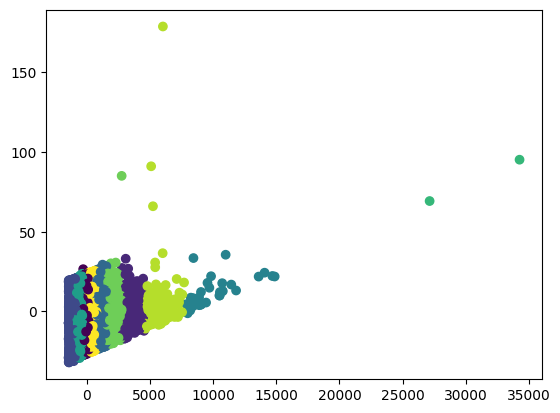

In [8]:
import matplotlib.pyplot as plt

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters)
plt.show()

e) reconstruct the samples to the original dimensions and find 3 anomalies

In [19]:
import numpy as np

reconstruido = pca.inverse_transform(principal_components)

erros = np.linalg.norm((X - reconstruido), axis=1)

anomalias = np.argsort(erros)[-3:]
print("Índices das 3 anomalias:", anomalias)
print("Reconstruct error: ", erros[anomalias])

Índices das 3 anomalias: [16669  3364 19006]
Reconstruct error:  [ 488.90487632  589.01027642 1223.96081873]
